In [1]:
%matplotlib inline

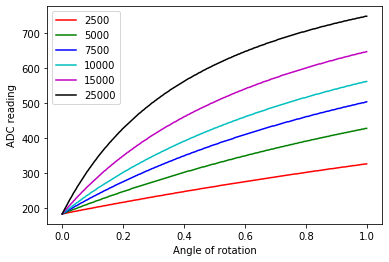

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def curve(x, RV, R1, R2):
    Rv = RV * x
    return (1024*(Rv+R2)/(R1+Rv+R2)).astype(int) # ADC units

def inverse_curve(y, RV, R1, R2):
    Rv = y * RV
    return (R2 - y*(R2-R1)/(y-1)*Rv)/1024

def chart(x, xlabel, ylabel, func, RV, R1, R2):
    y = func(x, RV, R1, R2)
    plt.plot(phi, y, col, label=str(RV))
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

x = range(270)
phi = np.linspace(0, 1, num=len(x))

for RV, col in zip((2500, 5000, 7500, 10000, 15000, 25000), "rgbcmky"):
    chart(phi, 'Angle of rotation', 'ADC reading', curve, RV, 10000, 2200)

plt.legend()
plt.show()

This indicates quite well why the majority of the control is achieved in the early part of the potentiometer travel. In the first 50 degrees the voltage reading changes by 350+ units, (7 units per degree) while the remaining 220 degrees change it less than 150 (roughly 2/3 unit per degree of travel). Clearly any solution that decreases the non-linearity will be of assistance, and so lower values of $R_v$ should be preferred.

This conflicts with the desire for a large input range, and effectively reduces the resolution of the current light demand, because the minimum output is fixed by the ratio of  $R_1$ to $R_v + R_2$ and larger values of $R_v$ produce higher output voltages.

Expressing the voltage $y$ as a function of $x$, the angle of rotation, we have

$$\begin{align}y &= \frac{R_2+R_v x}{R_1 + R_2 + R_v x}\\y (R_1 + R_2 + R_v x) &= (R_2 + R_v x)\\y R_1 + y R_2 + y R_v x &= R_2 + R_v x\\y R_v x - R_v x &= R_2  - yR_2 - yR_1\\(y-1)R_v x &= R_2  - y (R_2 - R_1)\\x &= \frac {R_2  - y (R_2 - R_1)}{(y - 1)R_v}\end{align}$$

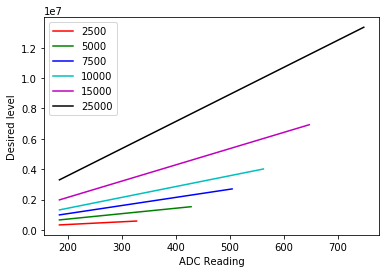

In [3]:
def inverse_curve(y, RV, R1, R2):
    Rv = y * RV
    return (R2 - y*(R2-R1)/(y-1)*Rv)/1024

for RV, col in zip((2500, 5000, 7500, 10000, 15000, 25000), "rgbcmky"):
    phi = np.linspace(0, 1, num=len(x))
    y = curve(phi, RV, 10000, 2200)
    phi = np.linspace(min(y), max(y), num=len(x))
    chart(phi, "ADC Reading", "Desired level", inverse_curve, RV, 1000, 270)

plt.legend()
plt.show()

A beautifully linear plot indicates we have indeed found the correct inverse. But what on Earth are the units for "desired level"?

In [4]:
#
# Duplicate for refactoring
#
import matplotlib.pyplot as plt
import numpy as np

def do_it_for(RV, R1, R2, col):

    def curve(x):
        return (1024*(RVs+R2)/(R1+RVs+R2)).astype(int) # ADC units

    def inverse_curve(y):
        return (R2 - y*(R2-R1)/(y-1)*RVs)/1024

    def compensated(x):
        return inverse_curve(curve(x))

    def chart(x, label, func):
        y = func(x)
        plt.plot(phi, y, col, label=str(RV))
        plt.ylabel(label)
        plt.xlabel('Angle of rotation')

    x = range(32)
    
    phi = np.linspace(0, 1, num=len(x))
    RVs = RV*phi
    
#    chart(phi, 'ADC reading', curve)
#    chart(phi, 'Compensation function', inverse_curve)
#    chart(phi, 'Compensated light demand', compensated)
#    chart(phi, "Test graphic", lambda x: x)
    chart(curve(RVs), 'Who knows', inverse_curve)
    plt.legend()

In [ ]:
for RV, col in zip((25, 50, 75, 100, 150, 250, 500), "rgbcmk"):
    do_it_for(RV, 10, 2.2, col)
plt.show()

In [ ]:
#
# Duplicate for refactoring
#
import matplotlib.pyplot as plt
import numpy as np

def do_it_for(RV, R1, R2, col):

    def curve(x):
        return (1024*(RVs+R2)/(R1+RVs+R2)).astype(int) # ADC units

    def inverse_curve(y):
        return (R2 - y*(R2-R1)/(y-1)*RVs)/1024

    def compensated(x):
        return inverse_curve(curve(x))

    def chart(x, label, func):
        y = func(x)
        plt.plot(phi, y, col, label=str(RV))
        plt.ylabel(label)
        plt.xlabel('Angle of rotation')

    x = range(16)
    
    phi = np.linspace(0, 1, num=len(x))
    RVs = RV*phi
    
#    chart(phi, 'ADC reading', curve)
    chart(phi, 'Compensation function', inverse_curve)
#    chart(phi, 'Compensated light demand', compensated)
#    chart(phi, "Test graphic", lambda x: x)
    chart(RVs, 'Who knows', curve)
    plt.legend()

In [ ]:
do_it_for(100, 10, 2.2, col)

In [ ]:
y = np.array(range(200, 1000))
RV, R1, R2 = 100_000, 10_000, 2_200

def inverse_curve(y):
    return (R2 - y*(R2-R1)/((y-1)*RV))/1024

In [ ]:
inv = inverse_curve(y)
plt.plot(y, inv, 'blue', label='Special')
plt.ylabel('Y label')
plt.xlabel('ADC reading')
plt.show()

In [ ]:
max(inv), min(inv), max(inv)-min(inv)

In [9]:
from itertools import count

def in_gen():
    t: count = count()
    "Generate a sequence of input values over time."
    for t in range(10):
        yield 0
    
    

In [ ]:
class DimmedLight():
    §1q§